# Bike - Sharing Assignment 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Set display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500
pd.options.display.width = 1000
pd.options.display.expand_frame_repr = False

## Step 1: Read and Understand Data

In [4]:
# import data
bikedata = pd.read_csv('day.csv')
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of data
bikedata.shape

(730, 16)

In [6]:
# check the info of the data
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking description
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Observation: 

- There are total 730 rows and 13 columns.
- Seems there are no null values in any columns on check of info().
- `Instant` is just serial no of the raw, so we can drop that column.
- `dteday` is a date data , we already have  `mnth` and `yr` column so we can drop `dteday` column as well.
- Target feature/column is `cnt`.

In [8]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [9]:
# renaming the columns for better understanding.

bikedata.rename(columns = {'yr':'year','mnth':'month', 'weathersit':'weather','hum':'humidity','cnt':'count'},inplace=True)

In [10]:
bikedata.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: (EDA)Visualising the Data

In [11]:
# check count is equal to casual + registered

if bikedata['casual'].all() + bikedata['registered'].all() == bikedata['count'].all():
    print('yes')
else:
    print('no')

yes


In [12]:
#  creating new dataFrame, eleminating avoidable columns

new_columns =['season','year','month','holiday','weekday','workingday','weather','temp','atemp','humidity','windspeed','count']
new_bikedata = bikedata[new_columns]
new_bikedata.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Observations:

Upon observation, it is evident that while all the columns are numerical, the data dictionary reveals that certain columns also represent categorical information.

- Categorical Types: Season, Month, Weekday, Weather
- Binary Types: Year, Holiday, Working Day
- Numeric Types: Temperature, Feels-like Temperature, Humidity, Wind Speed, Count

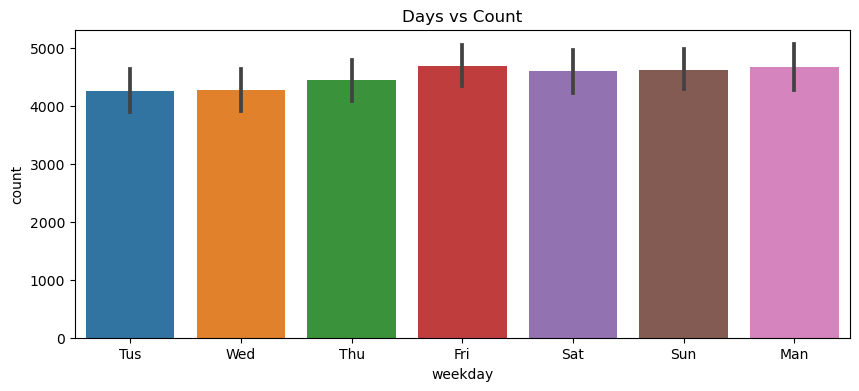

In [13]:
# Analyzing bike rented on daily basis

# renaming days as per data dictionary,- weekday : day of the week
new_bikedata['weekday'] = new_bikedata['weekday'].map({0:'Man',1:'Tus',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

# visulizing bike rents on weekdays
fig = plt.figure(figsize=[10,4])
sns.barplot(data = new_bikedata, x='weekday', y='count')
plt.title('Days vs Count')
plt.show()

### Observations:
- seems all the days wave almost same demand for the bikes, Friday, Saturday, Sunday, Manday seems to have a bit more demand campare to other days.
 

Text(0.5, 1.0, 'Month vs Count')

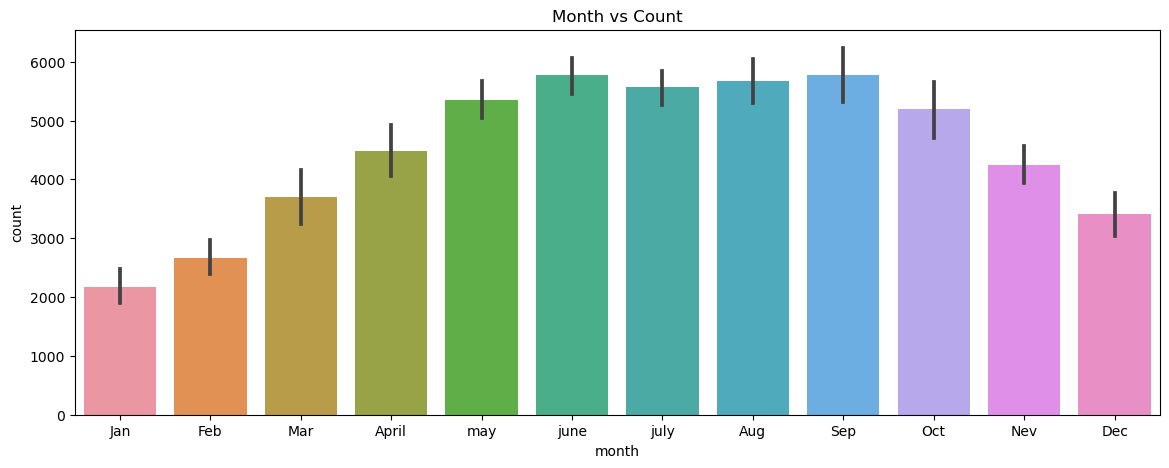

In [14]:
# analysing monthly bike rented

# renaming months as per dictionary, - mnth : month ( 1 to 12)
new_bikedata['month'] = new_bikedata['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                                   5:'may',6:'june',7:'july',8:'Aug',
                                                   9:'Sep',10:'Oct',11:'Nev',12:'Dec'})

fig = plt.figure(figsize=[14,5])
sns.barplot(data = new_bikedata, x='month',y='count')
plt.title('Month vs Count')

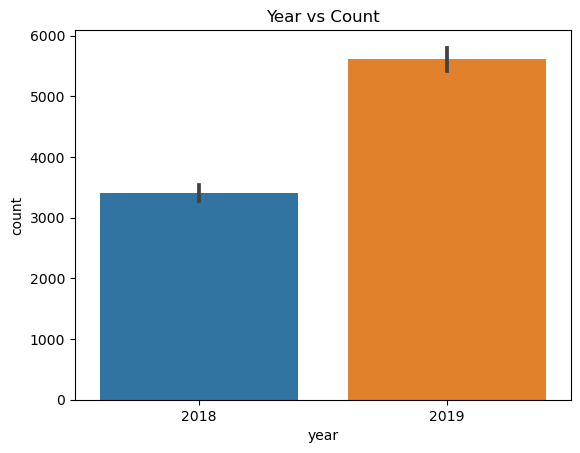

In [15]:
# analysing yearly bikes rented
# naming year as per the data dictionary, yr : year (0: 2018, 1:2019)

new_bikedata['year'] = new_bikedata['year'].map({0:2018,1:2019})

# visulizing count vs year

fig = plt.figure()
sns.barplot(data=new_bikedata, x='year',y='count')
plt.title('Year vs Count')
plt.show()

### Observations:

- on observing the graph we can say the demand for the rental bikes has increased double in year 2019 campare to 2018

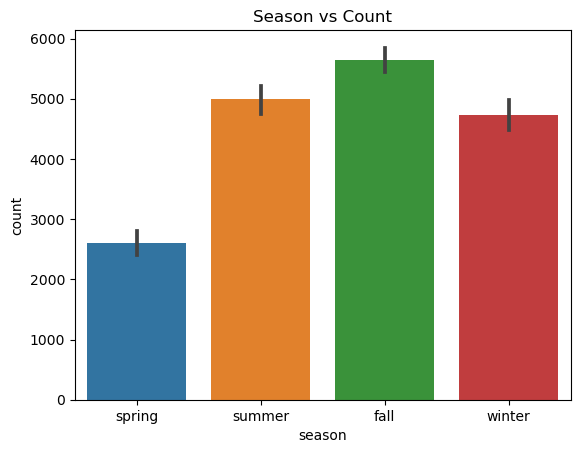

In [16]:
# analysing bike rented on Season
# as per data dictionary, season : season (1:spring, 2:summer, 3:fall, 4:winter)

# Mapping proper names for better visibilty
new_bikedata['season'] = new_bikedata['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})      

# plot a barplot between season and count
fig = plt.figure()
sns.barplot(data = new_bikedata, x='season',y='count')
plt.title('Season vs Count')
plt.show()

### Observations:

- on ploting the graph, we can say that most of the bikes were rented in fall followed by summer and winter,
- spring is the season with least bikes rented/registered

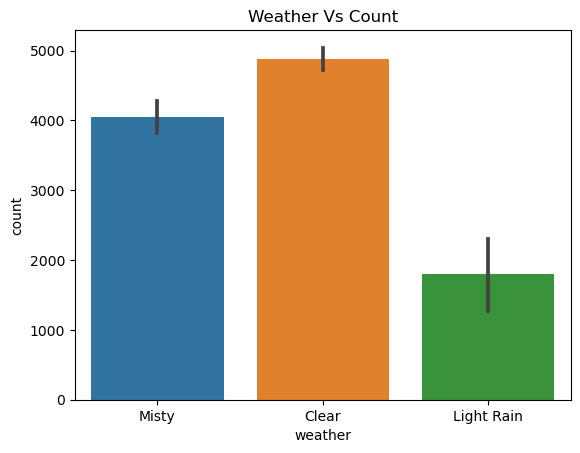

In [17]:
# analyzing rented bikes based on weather

# as per data dictionary , weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy = Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Misty
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Thunderstorm

# renaming weathersit for proper vusilization
new_bikedata['weather'] = new_bikedata['weather'].map({1:'Clear',2:'Misty',3:'Light Rain',4:'Thunderstorm'})

# plot a barplot between weather and count
fig = plt.figure()
sns.barplot(data = new_bikedata, x='weather',y='count')
plt.title('Weather Vs Count')
plt.show()

### Observation:
- Upon observing graph, we can say that most bikes are rented when the weather is Clear follower by Misty weather,
- No bikes where rented in a light rainy and Thunderstorm/heavy rainy weather

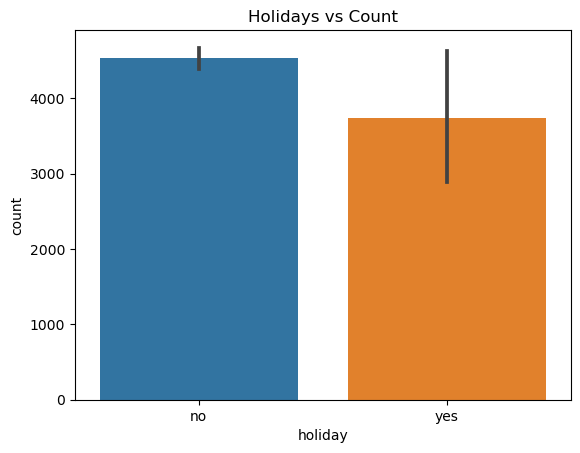

In [18]:
# analysing bike rented on holiday

# Mapping proper names for better visibilty
new_bikedata['holiday'] = new_bikedata['holiday'].map({0:'no', 1:'yes'})      

# plot a barplot between season and count
fig = plt.figure()
sns.barplot(data = new_bikedata, x='holiday',y='count')
plt.title('Holidays vs Count')
plt.show()

### Observation:
- less bikes were rented on holiday campare to other days

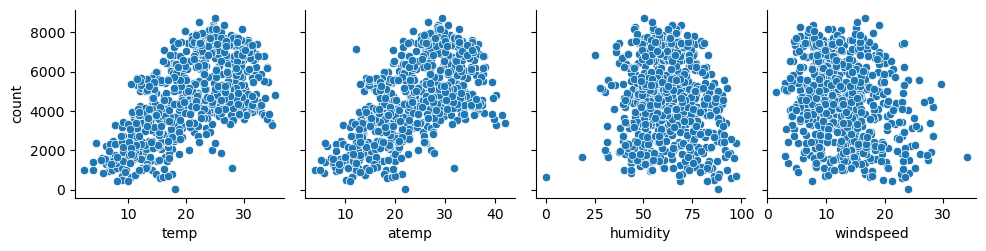

In [19]:
# Analyzing Numarical Variables

num_cols = ['temp', 'atemp','humidity','windspeed']
sns.pairplot(data=new_bikedata,x_vars=num_cols, y_vars='count')
plt.show()

 ### Observation:
 - `temp` and `atemp` variables seems to have a linear relationship with `count` variable

<b>Impartial variables which can be an excellent predictor from EDA are: </b> `month`, `weather`, `season`, `temp`,`workingday`

# Step 3: Data Processing

In [20]:
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [21]:
# converting object dtype to category dtype
cat_col = ['season','year','month','holiday','weather','weekday']
for i in new_bikedata[cat_col]:
    new_bikedata[i] = new_bikedata[i].astype('category')

In [22]:
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(2)
memory usage: 39.9 KB


In [23]:
# Get the dummy variables for the category feature and store it in a new variable - 'status'
status = pd.get_dummies(new_bikedata[cat_col])
status.head()

,season_fall,season_spring,season_summer,season_winter,year_2018,year_2019,month_April,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_no,holiday_yes,weather_Clear,weather_Light Rain,weather_Misty,weekday_Fri,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [24]:
# Let's drop column from status df using 'drop_first = True'

status = pd.get_dummies(new_bikedata[cat_col],drop_first=True)
status.head()

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Add the results to the original new_Bikedata dataframe

df_bike = pd.concat([new_bikedata,status],axis=1)
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
0,spring,2018,Jan,no,Tus,1,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,spring,2018,Jan,no,Wed,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,spring,2018,Jan,no,Thu,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,no,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,no,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
# droping non-numirical features 

df_bike = df_bike.drop(cat_col, axis=1) 
df_bike.head()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   workingday          730 non-null    int64  
 1   temp                730 non-null    float64
 2   atemp               730 non-null    float64
 3   humidity            730 non-null    float64
 4   windspeed           730 non-null    float64
 5   count               730 non-null    int64  
 6   season_spring       730 non-null    uint8  
 7   season_summer       730 non-null    uint8  
 8   season_winter       730 non-null    uint8  
 9   year_2019           730 non-null    uint8  
 10  month_Aug           730 non-null    uint8  
 11  month_Dec           730 non-null    uint8  
 12  month_Feb           730 non-null    uint8  
 13  month_Jan           730 non-null    uint8  
 14  month_Mar           730 non-null    uint8  
 15  month_Nev           730 non-null    uint8  
 16  month_Oc

- now we are left with 30 columns , let begin modeling process

In [28]:
# Importing the statsmodel and sklearn libraries to build a Linear Regression model.

import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [29]:
# Dividing the dataset into two separate dataframes for training and testing purposes.

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train_df_bike, df_test_df_bike = train_test_split(df_bike, train_size=0.70, random_state=100)

In [30]:
print('shape of Train data:',df_train_df_bike.shape)
print('shape of Test data :', df_test_df_bike.shape)

shape of Train data: (510, 30)
shape of Test data : (220, 30)


### 3.1 Scaling  the data

There are 2 main methods for scaling
- Standardisation (mean-0, sigma-1)
- Min-Max scaling


we will use Min-Max method for scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# Scaling all the numerical variables in the training dataset, excluding the 'Count' variable.
scaled_col =['temp','atemp','humidity','windspeed','count']
df_train_df_bike[scaled_col] = scaler.fit_transform(df_train_df_bike[scaled_col])

In [33]:
df_train_df_bike.head()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
576,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
111,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [34]:
# Checking all columns and variables after applying scaling.
df_train_df_bike.describe()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.098039,0.086275,0.084314,0.080392,0.076471,0.076471,0.084314,0.025490,0.029412,0.345098,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941
std,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.297660,0.281045,0.278131,0.272166,0.266010,0.266010,0.278131,0.157763,0.169124,0.475867,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


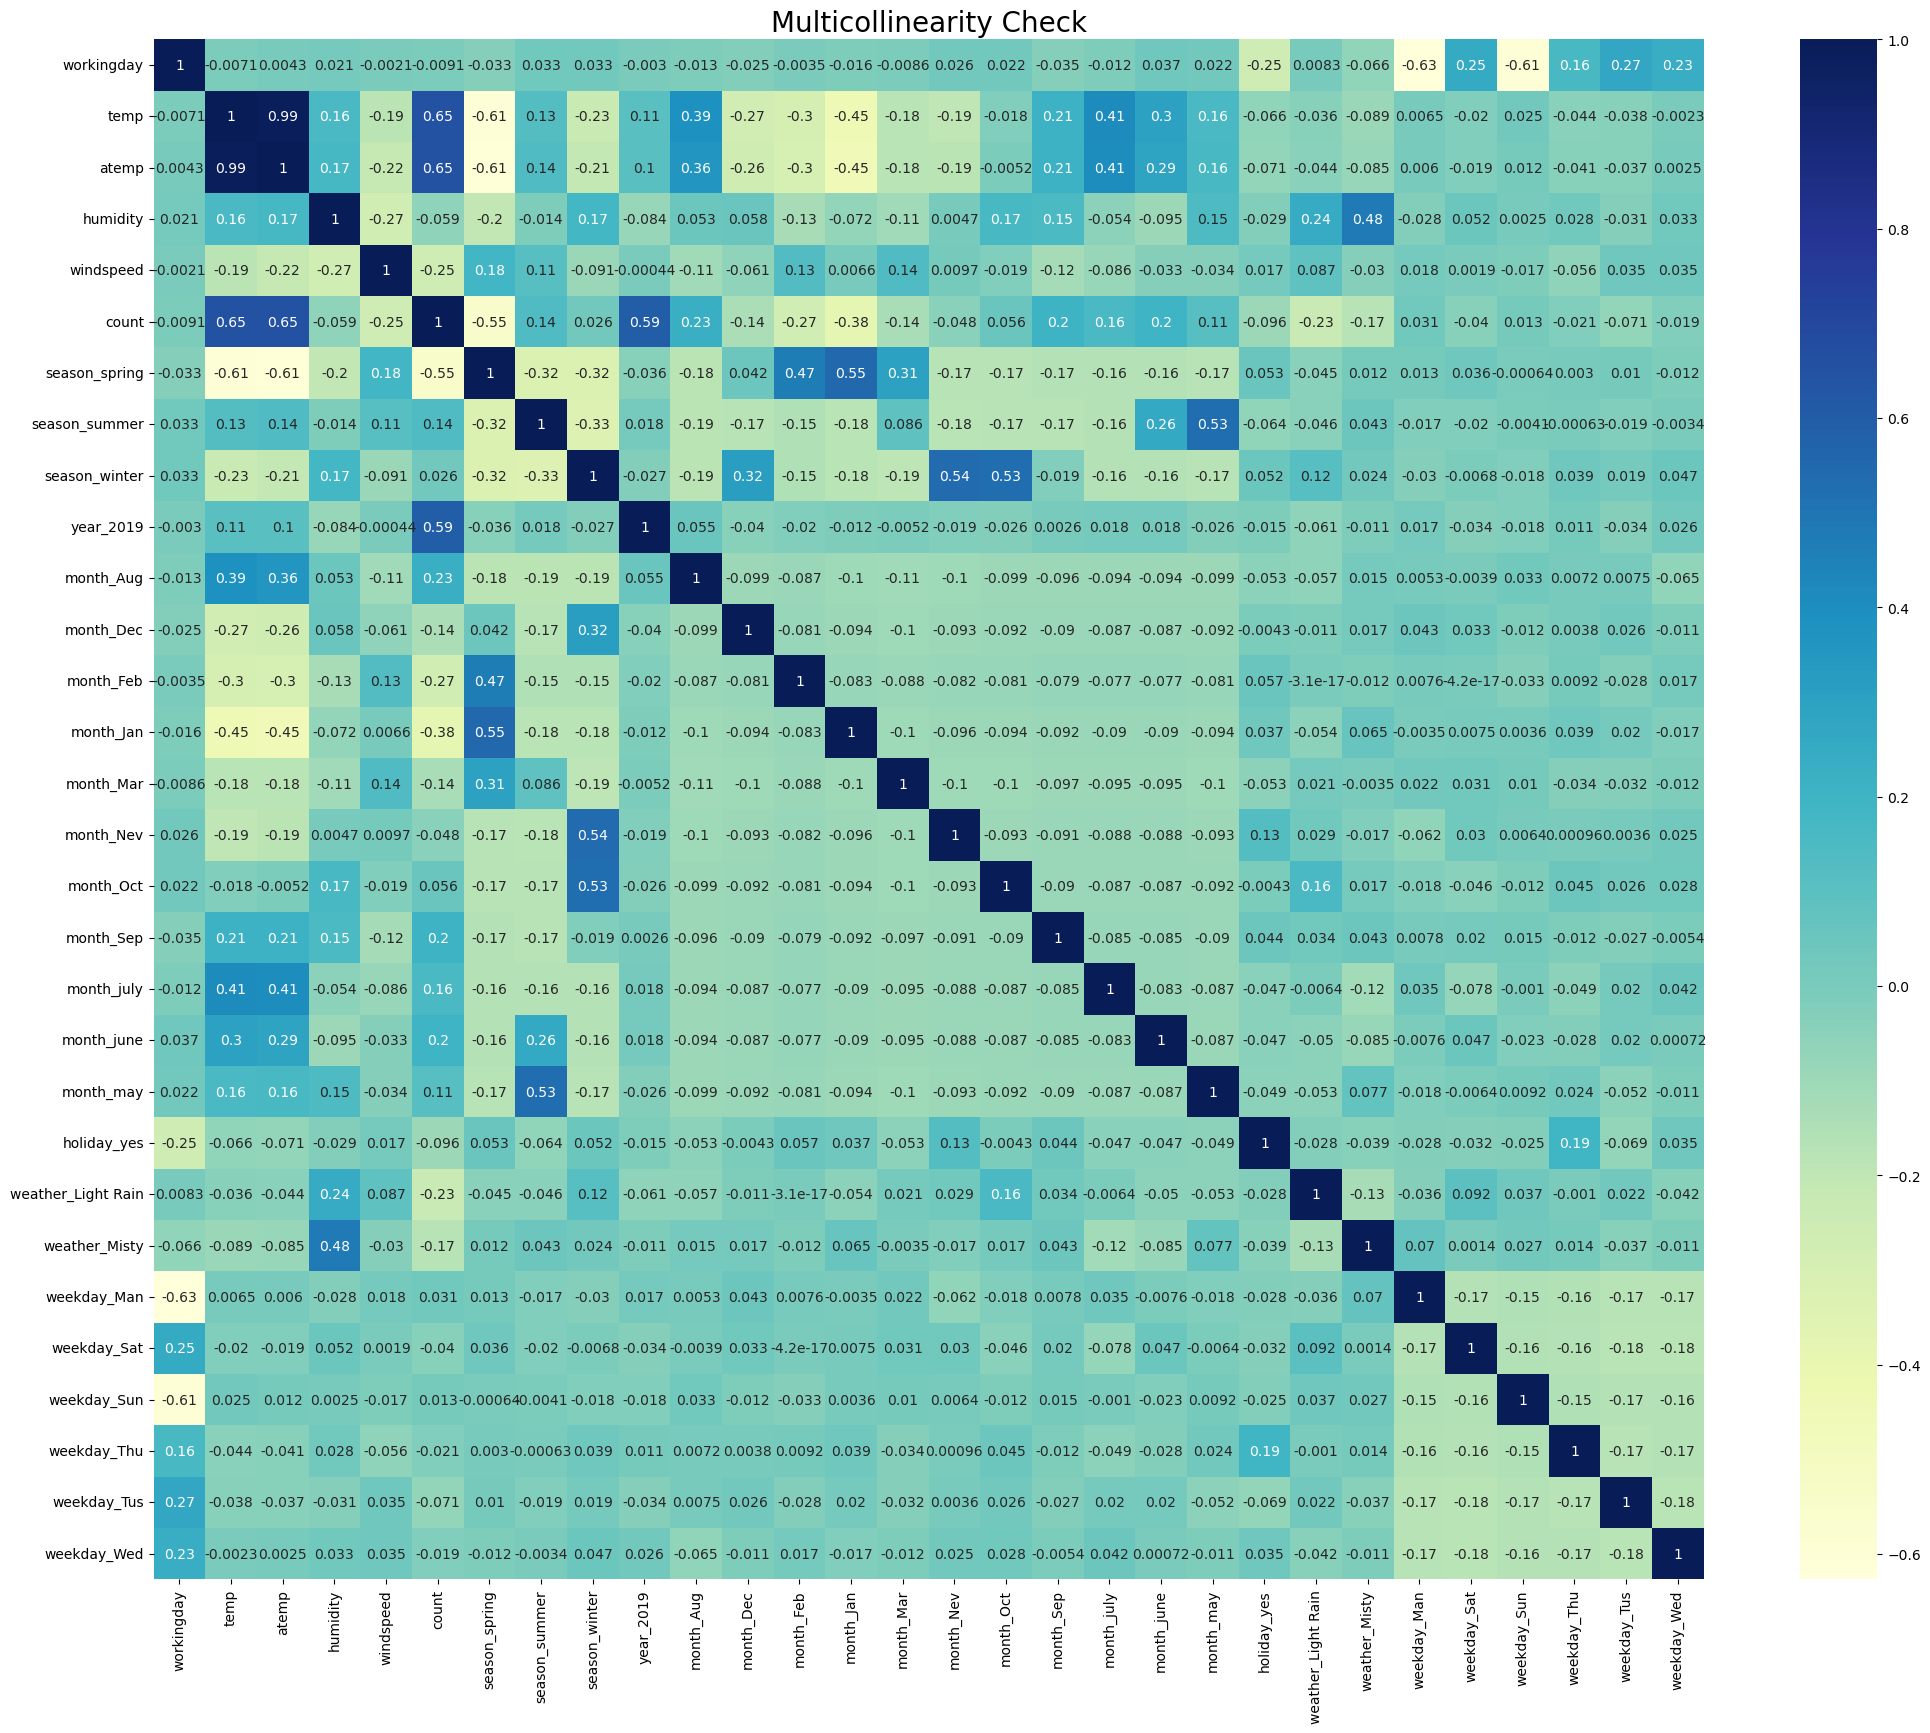

In [35]:
# before we begin to model, lets plot a heatmap to check the multicolinerity

fig = plt.figure(figsize=[25, 20])
sns.heatmap(df_train_df_bike.corr(), annot=True, cmap='YlGnBu')
plt.title('Multicollinearity Check', fontsize=20)
plt.show()


### Observation:

- The heatmap provides a clear visualization of variables that exhibit multicollinearity and the ones that have a high correlation with the target variable. 

- We will frequently consult this heatmap while constructing the linear model to confirm various correlated values, in conjunction with VIF (Variance Inflation Factor) and p-values, to help identify the correct variables to include or exclude from the model.

###  3.2  Model Building

In [36]:
# Splitting the training set into X_train and y_train sets for model construction.

y_train = df_train_df_bike.pop('count')
x_train = df_train_df_bike

In [37]:

print('y_train shape: ', y_train.shape)
print('y_train shape: ', x_train.shape)

y_train shape:  (510,)
y_train shape:  (510, 29)


In [38]:
# Importing the RFE library for feature selection, and subsequently, manual feature selection will be performed.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Utilizing RFE (Recursive Feature Elimination) for feature selection and restricting the selection to 15 features.

lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [40]:
list(zip(x_train, rfe.support_, rfe.ranking_))

[('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Mar', False, 15),
 ('month_Nev', True, 1),
 ('month_Oct', False, 13),
 ('month_Sep', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 12),
 ('month_may', False, 9),
 ('holiday_yes', True, 1),
 ('weather_Light Rain', True, 1),
 ('weather_Misty', True, 1),
 ('weekday_Man', False, 6),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 11),
 ('weekday_Tus', False, 8),
 ('weekday_Wed', False, 7)]

In [41]:
#creating a list of features selected by RFE

rfe_col = x_train.columns[rfe.support_]
rfe_col

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'year_2019', 'month_Dec', 'month_Jan', 'month_Nev', 'month_Sep', 'month_july', 'holiday_yes', 'weather_Light Rain', 'weather_Misty'], dtype='object')

In [42]:
# feature which are chosen by RFE during feature selection( so un-supported columns)

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_Aug', 'month_Feb', 'month_Mar', 'month_Oct', 'month_june', 'month_may', 'weekday_Man', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tus', 'weekday_Wed'], dtype='object')

In [43]:
x_train.head()

,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
576,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
426,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
111,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [44]:
# Generating a new training dataframe with the features selected through RFE (Recursive Feature Elimination).
rfe_x_train = x_train[rfe_col]
rfe_x_train.head()

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Jan,month_Nev,month_Sep,month_july,holiday_yes,weather_Light Rain,weather_Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,1


## Model - 1

In [45]:
# Add a constant
X_train_lm_1 = sm.add_constant(rfe_x_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        23:19:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3197      0.036      8.859      0.000       0.249       0.391
temp                   0.4815      0.037     13.005      0.000       0.409       0.554
humidity              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed             -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring         -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer          0.0423      0.015      2.761      0.006       0.012       0.072
season_winter          0.1019      0.018      5.656      0.000       0.067       0.137
year_2019              0.2304      0.008     28.487      0.000       0.215       0.246
month_Dec             -0.0355      0.018     -2.024      0.043      -0.070      -0.001
month_Jan             -0.0434      0.018     -2.393      0.017      -0.079      -0.008
month_Nev             -0.0387      0.019     -2.057      0.040      -0.076      -0.002
month_Sep              0.0755      0.017      4.466      0.000       0.042       0.109
month_july            -0.0553      0.018     -3.030      0.003      -0.091      -0.019
holiday_yes           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
weather_Light Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weather_Misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# importing libary to check VIF value for feature variable.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe_x_train, i) for i in range(rfe_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
1,humidity,30.89
0,temp,17.79
2,windspeed,4.72
3,season_spring,4.37
5,season_winter,4.06
4,season_summer,2.82
14,weather_Misty,2.32
6,year_2019,2.09
9,month_Nev,1.85
8,month_Jan,1.75


## Model - 2

- Droping feature `humidity` due to high VIF value

In [47]:
rfe2_x_train = rfe_x_train.drop('humidity',axis=1)

In [48]:
# Add a constant
X_train_lm_2 = sm.add_constant(rfe2_x_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          4.75e-186
Time:                        23:19:46   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2450      0.032      7.618      0.000       0.182       0.308
temp                   0.4387      0.036     12.093      0.000       0.367       0.510
windspeed             -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring         -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer          0.0349      0.015      2.251      0.025       0.004       0.065
season_winter          0.0869      0.018      4.831      0.000       0.052       0.122
year_2019              0.2345      0.008     28.687      0.000       0.218       0.251
month_Dec             -0.0428      0.018     -2.413      0.016      -0.078      -0.008
month_Jan             -0.0500      0.018     -2.719      0.007      -0.086      -0.014
month_Nev             -0.0395      0.019     -2.064      0.040      -0.077      -0.002
month_Sep              0.0687      0.017      4.015      0.000       0.035       0.102
month_july            -0.0500      0.019     -2.703      0.007      -0.086      -0.014
holiday_yes           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
weather_Light Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weather_Misty         -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe2_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe2_x_train, i) for i in range(rfe2_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
0,temp,5.17
1,windspeed,4.67
4,season_winter,2.95
2,season_spring,2.89
3,season_summer,2.24
5,year_2019,2.07
8,month_Nev,1.81
7,month_Jan,1.66
10,month_july,1.59
13,weather_Misty,1.57


## Model - 3

- Droping `month_Nev` due to high p-value and low VIF value

In [50]:
rfe3_x_train = rfe2_x_train.drop('month_Nev',axis=1)

In [51]:
# Add a constant
X_train_lm_3 = sm.add_constant(rfe3_x_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.74e-186
Time:                        23:19:46   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2283      0.031      7.310      0.000       0.167       0.290
temp                   0.4581      0.035     13.031      0.000       0.389       0.527
windspeed             -0.1594      0.025     -6.291      0.000      -0.209      -0.110
season_spring         -0.0632      0.021     -2.979      0.003      -0.105      -0.022
season_summer          0.0404      0.015      2.635      0.009       0.010       0.070
season_winter          0.0774      0.017      4.438      0.000       0.043       0.112
year_2019              0.2343      0.008     28.573      0.000       0.218       0.250
month_Dec             -0.0283      0.016     -1.731      0.084      -0.060       0.004
month_Jan             -0.0451      0.018     -2.467      0.014      -0.081      -0.009
month_Sep              0.0742      0.017      4.373      0.000       0.041       0.108
month_july            -0.0499      0.019     -2.686      0.007      -0.086      -0.013
holiday_yes           -0.0982      0.026     -3.783      0.000      -0.149      -0.047
weather_Light Rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
weather_Misty         -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe3_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe3_x_train, i) for i in range(rfe3_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
0,temp,5.14
1,windspeed,4.62
2,season_spring,2.89
3,season_summer,2.24
5,year_2019,2.07
4,season_winter,2.05
7,month_Jan,1.65
9,month_july,1.59
12,weather_Misty,1.57
8,month_Sep,1.34


## Model - 4

- Droping `month_Dec` due to high p-value and low VIF value

In [53]:
rfe4_x_train = rfe3_x_train.drop('month_Dec',axis=1)

In [54]:
# Add a constant
X_train_lm_4 = sm.add_constant(rfe4_x_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          8.14e-187
Time:                        23:19:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2154      0.030      7.088      0.000       0.156       0.275
temp                   0.4721      0.034     13.772      0.000       0.405       0.539
windspeed             -0.1549      0.025     -6.135      0.000      -0.205      -0.105
season_spring         -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_summer          0.0434      0.015      2.845      0.005       0.013       0.073
season_winter          0.0757      0.017      4.335      0.000       0.041       0.110
year_2019              0.2343      0.008     28.517      0.000       0.218       0.250
month_Jan             -0.0383      0.018     -2.138      0.033      -0.073      -0.003
month_Sep              0.0764      0.017      4.506      0.000       0.043       0.110
month_july            -0.0503      0.019     -2.706      0.007      -0.087      -0.014
holiday_yes           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
weather_Light Rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weather_Misty         -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe4_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe4_x_train, i) for i in range(rfe4_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
0,temp,5.13
1,windspeed,4.62
2,season_spring,2.75
3,season_summer,2.24
5,year_2019,2.07
4,season_winter,1.78
6,month_Jan,1.61
8,month_july,1.59
11,weather_Misty,1.56
7,month_Sep,1.34


## Model - 5

- Droping `month_Jan` due to high p-value and low VIF value

In [56]:
rfe5_x_train = rfe4_x_train.drop('month_Jan',axis=1)

In [57]:
# Add a constant
X_train_lm_5 = sm.add_constant(rfe5_x_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        23:19:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1994      0.030      6.746      0.000       0.141       0.258
temp                   0.4910      0.033     14.770      0.000       0.426       0.556
windspeed             -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring         -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer          0.0465      0.015      3.051      0.002       0.017       0.076
season_winter          0.0817      0.017      4.730      0.000       0.048       0.116
year_2019              0.2336      0.008     28.352      0.000       0.217       0.250
month_Sep              0.0768      0.017      4.517      0.000       0.043       0.110
month_july            -0.0521      0.019     -2.790      0.005      -0.089      -0.015
holiday_yes           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
weather_Light Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weather_Misty         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 6

- Droping `month_july` due to high p-value and low VIF value

In [58]:
rfe6_x_train = rfe5_x_train.drop('month_july',axis=1)

In [59]:
# Add a constant
X_train_lm_6 = sm.add_constant(rfe6_x_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.47e-186
Time:                        23:19:46   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1909      0.030      6.447      0.000       0.133       0.249
temp                   0.4777      0.033     14.423      0.000       0.413       0.543
windspeed             -0.1481      0.025     -5.854      0.000      -0.198      -0.098
season_spring         -0.0554      0.021     -2.654      0.008      -0.096      -0.014
season_summer          0.0621      0.014      4.350      0.000       0.034       0.090
season_winter          0.0945      0.017      5.630      0.000       0.062       0.127
year_2019              0.2341      0.008     28.237      0.000       0.218       0.250
month_Sep              0.0910      0.016      5.566      0.000       0.059       0.123
holiday_yes           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
weather_Light Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
weather_Misty         -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe6_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe6_x_train, i) for i in range(rfe6_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
1,windspeed,4.60
0,temp,3.84
5,year_2019,2.07
2,season_spring,1.99
3,season_summer,1.90
4,season_winter,1.63
9,weather_Misty,1.55
6,month_Sep,1.23
8,weather_Light Rain,1.08
7,holiday_yes,1.04


## Model - 7

- Droping `season_spring` due to high p-value

In [61]:
rfe7_x_train = rfe6_x_train.drop('season_spring',axis=1)

In [62]:
# Add a constant
X_train_lm_7 = sm.add_constant(rfe7_x_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm_7).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.83e-186
Time:                        23:19:46   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1259      0.017      7.508      0.000       0.093       0.159
temp                   0.5480      0.020     27.360      0.000       0.509       0.587
windspeed             -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_summer          0.0881      0.010      8.437      0.000       0.068       0.109
season_winter          0.1293      0.011     12.314      0.000       0.109       0.150
year_2019              0.2329      0.008     27.962      0.000       0.216       0.249
month_Sep              0.1012      0.016      6.330      0.000       0.070       0.133
holiday_yes           -0.0987      0.026     -3.738      0.000      -0.151      -0.047
weather_Light Rain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
weather_Misty         -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# creating a new dataFrame cantaining the names of all the variance with there respective VIF values

vif = pd.DataFrame()
vif['features'] = rfe7_x_train.columns
vif['VIF'] = [variance_inflation_factor(rfe7_x_train, i) for i in range(rfe7_x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
0,temp,3.68
1,windspeed,3.06
4,year_2019,2.00
2,season_summer,1.57
8,weather_Misty,1.48
3,season_winter,1.37
5,month_Sep,1.20
7,weather_Light Rain,1.08
6,holiday_yes,1.04


### Observations:

-  All the coefficients are statistically significant (p-values are very close to 0), indicating that they contribute significantly to the model.
- The Variance Inflation Factor (VIF) values for the remaining features are below 5, which is acceptable. multicollinearity is not a significant concern in the model.

- For now, we will consider this as our final model unless the test data metrics are significantly different from these results.

### Final Model Interpretation

- **Hypothesis Testing:** </br></br>
   Hypothesis testing states that: </br></br>
    H0 : B1=B2=B3= ... =Bn = 0 </br>
    H1 : at least one Bi!=0


 **Model 7 coefficient values:**

- const       	= 0.1259
- temp 			= 0.5480
- windspeed 	= -0.1532
- Season_summer = 0.0881
- Season_winter = 0.1293
- Year_2019		= 0.2329
- Month_Sept 	= 0.1012
- holiday_Yes 	= -0.0987
- weather_Light Rain = -0.2829
- weather_Misty = -0.0784

</b>



- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- **F-Statistics  : 271.9**
- **Prob (F-statistic): 2.83e-186** 
- The F-Statistics value of **264.2** (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

**The equation for best fitted line based on Model 7:**
</br>

**Count** = 0.1259 + (`temp` * 0.5480) - (`windspeed` * 0.1532) + (`Season_summer` * 0.0881) + (`Season_winter` * 0.1293) + (`Year_2019` * 0.2329) + (`Month_Sept` * 0.1012) - (`holiday_yes` * 0.0987) - (`weather_Light Rain` * 0.2829) - (`weather_Misty` * 0.0784)


## Step 4: Residual Analysis of the train data

In [64]:
X_train_lm_7.head()

,const,temp,windspeed,season_summer,season_winter,year_2019,month_Sep,holiday_yes,weather_Light Rain,weather_Misty
576,1.0,0.815169,0.264686,0,0,1,0,0,0,0
426,1.0,0.442393,0.255342,0,0,1,0,0,0,1
728,1.0,0.245101,0.663106,0,0,1,0,0,0,0
482,1.0,0.395666,0.188475,1,0,1,0,0,0,1
111,1.0,0.345824,0.380981,1,0,0,0,0,0,1


In [65]:
y_train_pred = lr_7.predict(X_train_lm_7)
y_train_pred.head()

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
dtype: float64

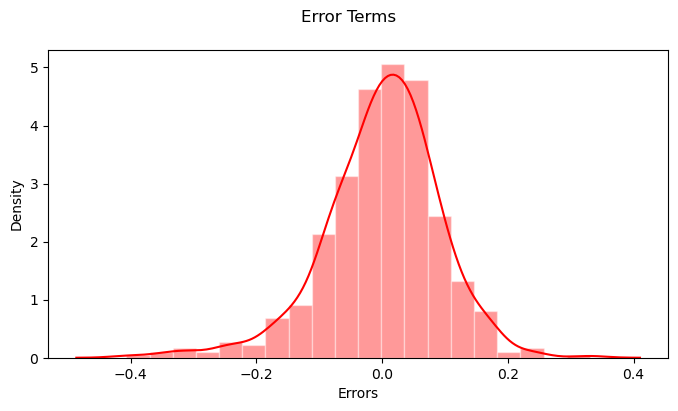

In [66]:
residuals = y_train - y_train_pred

# Plot the histogram of the error terms with white edge
fig = plt.figure(figsize=[8, 4])
ax = sns.distplot(residuals, bins=20, color='red', hist_kws={'edgecolor': 'white'})
fig.suptitle('Error Terms')  # Plot heading
ax.set_xlabel('Errors')
plt.show()

- We can observe that the error terms are normally distributed.

## Step 5: Check for Homoscedasticity

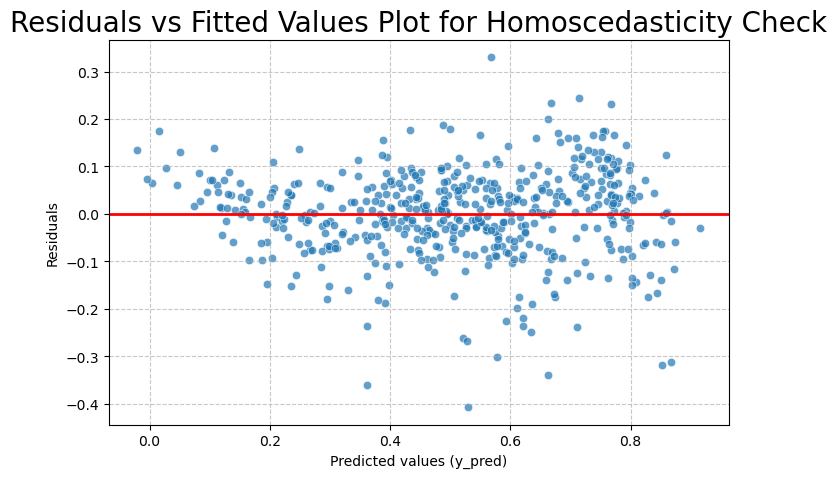

In [67]:
# Check for Homoscedasticity
plt.figure(figsize=[8, 5])
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.7)
plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Residuals')

# Add a horizontal red line at y=0
plt.axhline(0, color='red', linestyle='-', linewidth=2)

plt.title('Residuals vs Fitted Values Plot for Homoscedasticity Check', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

## Step 6: Model Evaluation

- Applying the scaling on the test sets

In [68]:
df_test_df_bike.head()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
184,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
535,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
299,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
221,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [69]:
# Scaling all the numerical variables in the training dataset, excluding the 'Count' variable.

scaled_col =['temp','atemp','humidity','windspeed','count']
df_test_df_bike[scaled_col] = scaler.transform(df_test_df_bike[scaled_col])

In [70]:
df_test_df_bike.head()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
184,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
535,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
299,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
221,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [71]:
df_test_df_bike.describe()

,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Mar,month_Nev,month_Oct,month_Sep,month_july,month_june,month_may,holiday_yes,weather_Light Rain,weather_Misty,weekday_Man,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tus,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.054545,0.072727,0.086364,0.086364,0.104545,0.095455,0.086364,0.036364,0.027273,0.318182,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727
std,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.227609,0.260281,0.281541,0.281541,0.306665,0.294512,0.281541,0.187620,0.163248,0.466833,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872
min,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test_df_bike.pop('count')
X_test = df_test_df_bike

In [73]:
new_X_test = X_test[rfe7_x_train.columns]

In [74]:
print(y_test.shape)
print(new_X_test.shape)

(220,)
(220, 9)


In [75]:
# Adding a constant variable 
X_test_new1 = sm.add_constant(new_X_test)
X_test_new1.head()

,const,temp,windspeed,season_summer,season_winter,year_2019,month_Sep,holiday_yes,weather_Light Rain,weather_Misty
184,1.0,0.831783,0.084219,0,0,0,0,1,0,1
535,1.0,0.901354,0.153728,1,0,1,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0


In [76]:
# let predict using test data
y_test_pred = lr_7.predict(X_test_new1)
y_test_pred.head()

184    0.391783
535    0.917258
299    0.406241
221    0.557025
152    0.579506
dtype: float64

### Finding R-squared and Adjusted R-Squared for Train and Test set

Text(0, 0.5, 'y_test_pred')

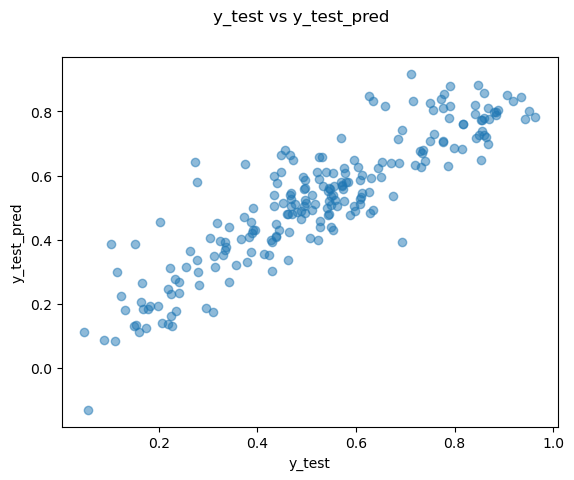

In [77]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.5)
fig.suptitle('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

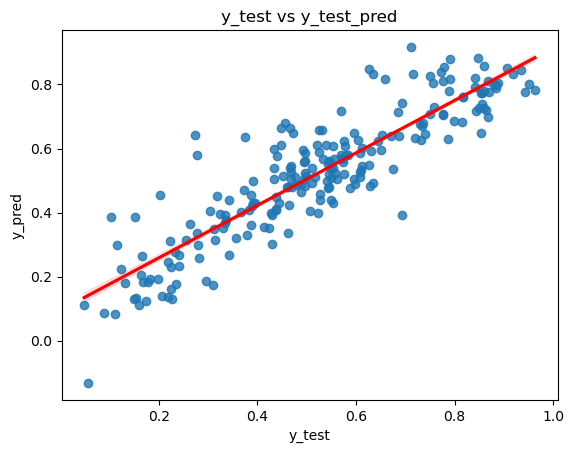

In [78]:
#Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [79]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train data r^2 :',round((r2_train*100),2))
print('Test data r^2 :',round((r2_test*100),2))

Train data r^2 : 83.03
Test data r^2 : 79.42


In [80]:
# n2 for test data ,n1 for train data is number of rows
n1 = rfe7_x_train.shape[0]
n2 = X_test.shape[0]

# Number of features (predictors, p2 for test data, p1 for train data) is the number of columns
p1 = rfe7_x_train.shape[1]
p2 = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)
adjusted_r2_test = 1-(1-r2_test)*(n2-1)/(n2-p2-1)

print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))
print('Test  data adjusted r^2 :',round((adjusted_r2_test *100),2))

Train data adjusted r^2 : 82.73
Test  data adjusted r^2 : 76.28


## Final Result Comparison between Train model and Test:


- Train R-square : **83.03%** . </br></br>
- Train Adjusted R-square : **82.73%**. </br></br>
- Test R-square: **79.42%** .</br></br>
- Test Adjusted R-square: **76.28%** . </br></br>
- Difference in **R-square** between train and test: **0.3%** .</br></br>
- Difference in **adjusted R-square** between Train and test: **3.14%** which is less than **5%** . </br></br>

    
    
### We Have Achived the Best Model

**As per our final Model, the below predictor variables influences bike booking :**

- Temperature (temp)
- Wind Speed 
- Season Summer 
- Season Winter
- Year 2019
- September Month
- If its a holiday
- If the weather is Light Rainy
- If the weather is Misty 

## Interpretation of Coefficients:

- Constant (Intercept): The constant value of '0.1259' signifies that even when all other predictor variables (i.e., when x1, x2... xn = 0) are absent, bike demand still increases by 0.1259 units.

- Temperature (temp): A coefficient value of '0.5480' indicates that a one-unit increase in the temperature variable results in a bike demand increase of 0.5480 units.

</b></b>

- Wind Speed (windspeed): A coefficient value of '-0.1532' suggests that a one-unit decrease in the windspeed variable leads to a decrease in bike demand by 0.1532 units.

</b></b>

- Summer Season (Season_summer): A coefficient value of '0.0881' signifies that a one-unit increase in the Summer season variable leads to a bike demand increase of 0.0881 units.

</b></b>

- Winter Season (Season_winter): A coefficient value of '0.1293' indicates that a one-unit increase in the Winter season variable results in a bike demand increase of 0.1293 units.

</b></b>

- Year 2019 (Year_2019): A coefficient value of '0.2329' implies that a one-unit increase in the Year_2019 variable increases bike demand by 0.2329 units.

</b></b>

- September Month (Month_sept): A coefficient value of '0.1012' indicates that a one-unit increase in the September month variable results in a bike demand increase of 0.1012 units.

</b></b>

- Holiday (holiday_Yes): A coefficient value of '-0.0987' suggests that a one-unit decrease in the holiday_Yes variable leads to a decrease in bike demand by 0.0987 units.

</b></b>

- Light Rain Weather (weather_Light Rain): A coefficient value of '-0.2829' indicates that when the weather is good (Light Rain), bike demand increases by 0.2829 units for a one-unit increase in this variable.

</b></b>

- Misty Weather (weather_Misty): A coefficient value of '-0.2829' indicates that when the weather is good (Misty), bike demand increases by 0.2829 units for a one-unit increase in this variable.

## Business Goals:

- BoomBikes, a US bike-sharing provider, should give more attention to temperature as it significantly influences bike demand.

</b></b>

- The data shows that bike demand was higher in 2019 compared to 2018. Therefore, BoomBikes should focus on this increasing trend, especially since they may be experiencing revenue dips due to the ongoing pandemic. It's anticipated that things will improve as the situation subsides. 

</b></b>

- BoomBikes can concentrate more on the Summer and Winter seasons, specifically targeting August and September. Additionally, they should consider both weekends and working days, as these factors have a notable impact on bike rentals.  

</b></b>


- The analysis reveals that the Spring season has negative coefficients, indicating a negative correlation with bike rentals. To address this, BoomBikes can introduce promotional offers during the Spring season to stimulate demand.

</b></b>

- Taking into account the weathersit variable, negative coefficients are observed for "Mist + cloudy" and "Light snow" weather conditions. BoomBikes can consider offering promotions during such weather conditions to attract more customers. 